In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation



Using TensorFlow backend.


In [2]:
GJ_2009 = pd.read_csv("./data/final_group_2009.csv")
GJ_2010 = pd.read_csv("./data/final_group_2010.csv")
GJ_2011 = pd.read_csv("./data/final_group_2011.csv")
GJ_2012 = pd.read_csv("./data/final_group_2012.csv")
GJ_2013 = pd.read_csv("./data/final_group_2013.csv")
GJ_2014 = pd.read_csv("./data/final_group_2014.csv")
GJ_2015 = pd.read_csv("./data/final_group_2015.csv")
GJ_2016 = pd.read_csv("./data/final_group_2016.csv")
GJ_2017 = pd.read_csv("./data/final_group_2017.csv")

In [3]:
GJ_2016.columns

Index(['sex', 'year', 'sido', 'height_2016', 'weight_2016', 'waist_2016',
       'sight_left_2016', 'sight_right_2016', 'hearing_left_2016',
       'hearing_right_2016', 'SBP_2016', 'RPBP_2016', 'cholesterol_2016',
       'triglycerides_2016', 'HDL_2016', 'LDL_2016', 'blood_pigment_2016',
       'urine_protein_2016', 'serum_creatinine_2016', 'AST_2016', 'ALT_2016',
       'gamma_gtp_2016', 'smoking_2016', 'oral_inspection_2016', 'target',
       'stress_percentage', 'smoke_percentage', 'alcohol_percentage',
       'health_percentage', 'pressure_percentage'],
      dtype='object')

In [4]:
# 2016년도는 알코올 변수가 없어서 제거

del GJ_2009['alcohol_2009']
del GJ_2010['alcohol_2010']
del GJ_2011['alcohol_2011']
del GJ_2012['alcohol_2012']
del GJ_2013['alcohol_2013']
del GJ_2014['alcohol_2014']
del GJ_2015['alcohol_2015']
# del GJ_2016['alcohol_2016']
del GJ_2017['alcohol_2017']

In [5]:
GJ_2009.loc[0,'target']

0.123965979

In [6]:
group_01_Y =pd.concat( [ pd.Series(GJ_2009.loc[0,'target']),pd.Series(GJ_2010.loc[0,'target']), 
                       pd.Series(GJ_2011.loc[0,'target']), pd.Series(GJ_2012.loc[0,'target']), 
                       pd.Series(GJ_2013.loc[0,'target']), pd.Series(GJ_2014.loc[0,'target']), 
                       pd.Series(GJ_2015.loc[0,'target']), pd.Series(GJ_2016.loc[0,'target']), 
                       pd.Series(GJ_2017.loc[0,'target']) ])

group_01_Y

0    0.123966
0    0.128567
0    0.127495
0    0.126737
0    0.133388
0    0.065369
0    0.070101
0    0.070171
0    0.072436
dtype: float64

In [7]:
# del GJ_2009['target']
# del GJ_2010['target']
# del GJ_2011['target']
# del GJ_2012['target']
# del GJ_2013['target']
# del GJ_2014['target']
# del GJ_2015['target']
# del GJ_2016['target']
# del GJ_2017['target']

In [8]:
GJ_01 = pd.concat([ GJ_2009.iloc[0, :], GJ_2010.iloc[0, :],GJ_2011.iloc[0, :]
           ,GJ_2012.iloc[0, :],GJ_2013.iloc[0, :],GJ_2014.iloc[0, :],GJ_2015.iloc[0, :],
           GJ_2016.iloc[0, :],GJ_2017.iloc[0, :] ], axis=0)

GJ_01.shape

(270,)

In [9]:
group_01_X = pd.DataFrame(np.array(GJ_01).reshape(9,30))

In [10]:
group_01_X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,5.0,11.0,164.082246,64.275584,85.066084,0.835089,0.849314,1.050541,1.042505,...,25.433064,42.639791,1.882801,0.331779,0.123966,6.022633,9.439318,5.269804,9.477925,4.864434
1,1.0,5.0,11.0,164.286355,64.587731,85.115767,0.850260,0.853051,1.051059,1.044525,...,25.274991,42.498773,1.879216,0.339532,0.128567,5.447836,10.318163,5.139831,6.487352,4.312068
2,1.0,5.0,11.0,164.192092,64.525130,85.025088,0.842970,0.854034,1.046306,1.040214,...,24.761978,42.412784,1.908642,0.313033,0.127495,5.242181,9.025001,5.395798,7.162394,5.991064
3,1.0,5.0,11.0,164.198746,64.522639,85.004177,0.858097,0.857639,1.047118,1.042304,...,25.581728,42.685983,1.902737,0.341636,0.126737,5.344020,9.481327,5.324866,7.163669,5.152478
4,1.0,5.0,11.0,164.299008,64.643790,84.942024,0.867557,0.870964,1.046491,1.042075,...,25.444710,42.365930,1.912343,0.352282,0.133388,5.163603,9.145865,4.934956,7.030884,5.430357
5,1.0,5.0,11.0,173.919558,75.197807,84.784052,1.070561,1.069871,1.011224,1.010149,...,30.281621,50.007288,2.199261,0.458504,0.065369,5.642267,10.299977,4.922783,5.907340,5.093187
6,1.0,5.0,11.0,174.242687,75.816172,85.122337,1.064436,1.068575,1.011531,1.011322,...,31.107678,50.635732,2.173336,0.456646,0.070101,5.862395,8.605695,5.185965,6.613984,5.336282
7,1.0,5.0,11.0,170.479056,72.408390,85.412760,1.073057,1.071174,1.010183,1.010425,...,31.076026,51.031457,2.205851,0.447156,0.070171,5.716449,8.174336,4.785431,6.610226,5.735070
8,1.0,5.0,11.0,170.454959,72.630210,85.666327,1.068981,1.072022,1.010127,1.009610,...,31.658272,50.963437,2.177280,0.444054,0.072436,4.928141,8.545803,5.020429,5.020429,4.965056


In [11]:
group_01_Y = pd.DataFrame(group_01_Y)
group_01_X.shape, group_01_Y.shape

((9, 30), (9, 1))

In [12]:
len(group_01_Y) - 3 - 2 + 1

5

In [13]:
seq_length = 2
predict_year = 3

dataX= []
dataY= []

for i in range(0, int( len(group_01_Y) - seq_length - predict_year + 1)):  #1을 더해주지않으면 한칸 덜 가는 현상 발생
    _x = group_01_X [i : i+seq_length]
    _x = np.array(_x)
    _y = group_01_Y [i + seq_length : i+seq_length + predict_year]
    _y = np.array(_y)
    dataX.append(_x) # dataX 리스트에 추가 / add to dataX's list
    dataY.append(_y) # dataY 리스트에 추가 / add to dataY's list

In [14]:
np.array(dataX).shape, np.array(dataY).shape ,  len(dataY)

((5, 2, 30), (5, 3, 1), 5)

In [15]:
np.array(dataX).shape, np.array(dataY).shape

((5, 2, 29), (5, 3, 1))

In [15]:
# 학습용 데이터 생성 / Creating Train Set
train_size = int(len(dataY) * 0.9)

# 데이터를 잘라 학습용 데이터 생성 / Slicing Train Set
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])

print("="*50)
print(_x.shape)
print(_y.shape)
print(trainX.shape)
print(trainY.shape)
print("="*50)

(2, 30)
(3, 1)
(4, 2, 30)
(4, 3, 1)


In [16]:
trainX.shape, trainY.shape ,  testX.shape, testY.shape

((4, 2, 30), (4, 3, 1), (1, 2, 30), (1, 3, 1))

In [17]:
# Reshape을 해주어야 함

train_re_Y = trainY.reshape(4,predict_year)
test_re_Y = testY.reshape(1,predict_year)

train_re_Y.shape,  test_re_Y.shape

((4, 3), (1, 3))

In [19]:
## LSTM 모델 / LSTM Model

input_columns = 30 # 데이터 셋의 '열' 개수 (dataX) / dataset's columns (dataX)

model = Sequential()
model.add(LSTM(256, input_shape= (seq_length, input_columns), return_sequences=True, stateful=False, dropout=0.7))
model.add(LSTM(256, return_sequences=False, stateful=False, dropout=0.7))
#model.add(LSTM(256, return_sequences=True, stateful=True, dropout=0.7))
model.add(Dense(3))
model.add(Activation('softsign'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 2, 256)            293888    
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 819,971
Trainable params: 819,971
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 모델 학습 설정 및 진행 / Model Training options and Progress
keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(trainX, train_re_Y, epochs=30, batch_size=1, verbose=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/30
4/4 [==============================] - 2s 622ms/step - loss: 0.0267
Epoch 2/30
4/4 [==============================] - 0s 17ms/step - loss: 0.0321
Epoch 3/30
4/4 [==============================] - 0s 18ms/step - loss: 0.0487
Epoch 4/30
4/4 [==============================] - 0s 17ms/step - loss: 0.0198
Epoch 5/30
4/4 [==============================] - 0s 16ms/step - loss: 0.0250
Epoch 6/30
4/4 [==============================] - 0s 17ms/step - loss: 0.0352
Epoch 7/30
4/4 [==============================] - 0s 17ms/step - loss: 0.0275
Epoch 8/30
4/4 [==============================] - 0s 17ms/step - loss: 0.0252
Epoch 9/30
4/4 [==============================] - 0s 17ms/step - loss: 0.0388
Epoch 10/30
4/4 [==============================] - 0s 19ms/step - loss: 0.0430
Epoch 11/30
4/4 [==============================] - 0s 17ms/step - loss: 0.0427
Epoch 12/30
4/4 [==============================] - 0s 17ms/step - loss: 0.0902
Epoch 13/30


No handles with labels found to put in legend.


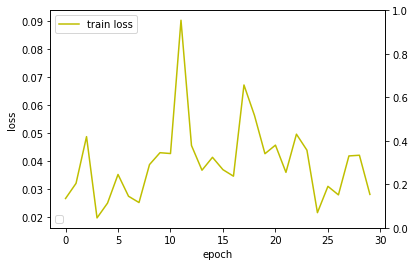

In [21]:
# 학습 과정 살펴보기 / watching train loss
#print(hist.history['loss'])
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [ ]:
# # 모델 저장 / Model Save
# model.save('lstm_practice.h5')

In [22]:
testX.shape , testY.shape

((1, 2, 30), (1, 3, 1))

In [23]:
y_pred = model.predict(testX, batch_size=1, verbose=1) # , steps=5

1/1 [==============================] - 0s 383ms/step


In [29]:
y_pred, testY

(array([[ 0.28806803,  0.13836817, -0.09667628]], dtype=float32),
 array([[0.07010094, 0.07017115, 0.07243579]]))

In [25]:
testY = testY.reshape(1,3)

In [26]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(testY,y_pred))
RMSE

0.16407252305933492

In [27]:
group_01_X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,5.0,11.0,164.082246,64.275584,85.066084,0.835089,0.849314,1.050541,1.042505,...,25.433064,42.639791,1.882801,0.331779,0.123966,6.022633,9.439318,5.269804,9.477925,4.864434
1,1.0,5.0,11.0,164.286355,64.587731,85.115767,0.850260,0.853051,1.051059,1.044525,...,25.274991,42.498773,1.879216,0.339532,0.128567,5.447836,10.318163,5.139831,6.487352,4.312068
2,1.0,5.0,11.0,164.192092,64.525130,85.025088,0.842970,0.854034,1.046306,1.040214,...,24.761978,42.412784,1.908642,0.313033,0.127495,5.242181,9.025001,5.395798,7.162394,5.991064
3,1.0,5.0,11.0,164.198746,64.522639,85.004177,0.858097,0.857639,1.047118,1.042304,...,25.581728,42.685983,1.902737,0.341636,0.126737,5.344020,9.481327,5.324866,7.163669,5.152478
4,1.0,5.0,11.0,164.299008,64.643790,84.942024,0.867557,0.870964,1.046491,1.042075,...,25.444710,42.365930,1.912343,0.352282,0.133388,5.163603,9.145865,4.934956,7.030884,5.430357
5,1.0,5.0,11.0,173.919558,75.197807,84.784052,1.070561,1.069871,1.011224,1.010149,...,30.281621,50.007288,2.199261,0.458504,0.065369,5.642267,10.299977,4.922783,5.907340,5.093187
6,1.0,5.0,11.0,174.242687,75.816172,85.122337,1.064436,1.068575,1.011531,1.011322,...,31.107678,50.635732,2.173336,0.456646,0.070101,5.862395,8.605695,5.185965,6.613984,5.336282
7,1.0,5.0,11.0,170.479056,72.408390,85.412760,1.073057,1.071174,1.010183,1.010425,...,31.076026,51.031457,2.205851,0.447156,0.070171,5.716449,8.174336,4.785431,6.610226,5.735070
8,1.0,5.0,11.0,170.454959,72.630210,85.666327,1.068981,1.072022,1.010127,1.009610,...,31.658272,50.963437,2.177280,0.444054,0.072436,4.928141,8.545803,5.020429,5.020429,4.965056


In [30]:
# 15,16,17  3개년도로 2018, 2019년 예측

test_pred_1819 = list()

# 15, 16, 17년 3개년 X 변수
test_X = group_01_X[-2:]
test_X = np.array(test_X)
test_pred_1819.append(test_X)

test_pred_1819 = np.array(test_pred_1819)

test_pred_1819.shape

(1, 2, 30)

In [31]:
test_re_Y
test_re_Y.shape

(1, 3)

In [32]:
y_pred_1819 = model.predict(test_pred_1819, batch_size=1, verbose=1)

y_pred_1819

1/1 [==============================] - 0s 2ms/step


array([[ 0.26449525,  0.13901877, -0.07847676]], dtype=float32)

In [34]:
group_01_Y

,0
0,0.123966
0,0.128567
0,0.127495
0,0.126737
0,0.133388
0,0.065369
0,0.070101
0,0.070171
0,0.072436
